# 核心能力提升班商业智能方向 004期 Week 7

### Thinking 1: 什么是反向传播中的链式法则

模型通过前向传播获得当前输出值，由损失函数可以计算出模型的损失以及损失函数的梯度，通过反向传播中的链式法则在模型中层层反向传递并更新模型参数。

### Thinking 2: 请列举几种常见的激活函数，激活函数有什么作用

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# sigmoid函数
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s
# tanh函数
def tanh(x):
    s = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return s
# ReLU函数
def ReLU(x):
    return np.maximum(0, x)
def plot_activation_function(activation_function):
    # 设置参数x（起点，终点，间距）
    x = np.arange(-8, 8, 0.2)
    y = activation_function(x)
    plt.plot(x, y)
    plt.show()

#### 常见的激活函数有：
* Sigmoid函数：其数学形式如下
$$Sigmoid(x)=\frac{1}{1+e^{-x}}$$
其函数图像如下：

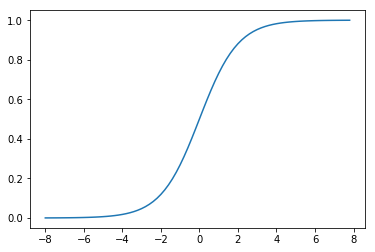

In [42]:
plot_activation_function(sigmoid)

* tanh函数: 其数学形式如下
$$tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
其函数图像如下

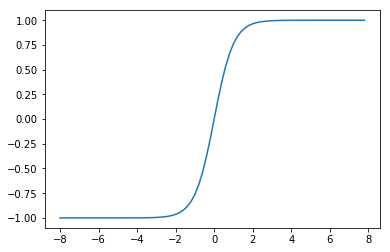

In [48]:
plot_activation_function(tanh)

* ReLU函数:其数学形式如下
$$ReLU(x)=max(0,x)$$
其函数图像如下

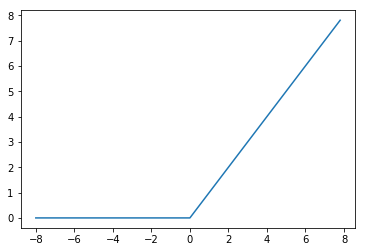

In [54]:
plot_activation_function(ReLU)

还有一些类似ReLU函数的变体函数:如Leaky ReLU和ELU函数等

#### 激活函数的作用
激活函数用于在神经网络中引入非线性拟合能力，如果不使用激活函数，无论神经网络有多少层，其输出都是输入的线性组合，不具有非线性拟合能力。

### Thinking 3: 利用梯度下降法训练神经网络，发现模型loss不变，可能有哪些问题？怎么解决？

训练过程中Loss不变或几乎不变，可能是以下原因：
1. 学习率过低：适当调高学习率
2. 学习率过大，因为越过极值点儿无法收敛：适当调低学习率
2. 数据中有异常值影响模型学习：在数据预处理阶段处理好异常值
3. 模型参数没有更新：检查代码编写问题

### Action 1: 使用Pytorch编写神经网络，完成boston房价预测问题
1）数据加载：from sklearn.datasets import load_boston  
2）网络结构：  
l1 = Linear(X, W1, b1)  
s1 = Relu(l1)  
l2 = Linear(s1, W2, b2)  
cost = MSE(y, l2)  
隐藏层维度为10  

#### numpy实现

In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 数据加载
data = load_boston()
X_ = data['data']
y = data['target']
y = y.reshape(y.shape[0],1)

In [4]:
# 数据规范化
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

In [5]:
# 设置随机种子
np.random.seed(33)

In [6]:
# 设置超参数
n_features = X_.shape[1] # 特征维度
n_hidden = 16 # 隐藏层节点数
learning_rate = 1e-5 # 学习率
# 参数初始化
w1 = np.random.randn(n_features, n_hidden) # 第一层隐藏层权重
b1 = np.zeros(n_hidden) # 第二层隐藏层偏重
w2 = np.random.randn(n_hidden, 1) # 第二层隐藏层权重=
b2 = np.zeros(1) # 第二层隐藏层偏置

In [7]:
# relu函数
def Relu(x):
    result = np.where(x<0,0,x)
    return result

In [8]:
# 损失函数MSE
def MSE_loss(y, y_hat):
    return np.mean(np.square(y_hat - y))

In [9]:
# 定义全连接层
def Linear(X, W1, b1):
    result = X.dot(W1) + b1
    return result

In [10]:
max_epoch = 300
iter_loss = []
for t in range(max_epoch):
    # 前向传播，计算预测值y
    l1 = Linear(X_, w1, b1)
    s1 = Relu(l1)
    #s1 = np.maximum(l1, 0)
    #print('s1=', s1.shape) #(506, 10)
    #print('w2=', w2.shape) #(506, 10)
    #print('s1.T=', s1.T.shape) #(10, 506)
    y_pred = Linear(s1, w2, b2)
    #y_pred = l2 = s1.dot(w2) + b2
    #print('y_pred=', y_pred.shape) #(506, 1)
    #print('y=', y.shape) #(506, 1)


    #temp = X.dot(w1)
    #temp_relu = np.maximum(temp, 0)
    #y_pred = temp_relu.dot(w2)

    # 计算损失函数
    loss = MSE_loss(y, y_pred)
    #print(y_pred)
    #print(y_pred.shape)
    if t%100 == 0:
        print(t, loss)
    iter_loss.append(loss)
    # 反向传播，基于loss 计算w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = s1.T.dot(grad_y_pred) #(10, 506) * (506, 506)
    #print('grad_w2=', grad_w2.shape) #(10, 506)
    #print('grad_y_pred=', grad_y_pred.shape) #(506, 506)
    #print('w2.T=', w2.T.shape) #(1, 10)
    grad_temp_relu = grad_y_pred.dot(w2.T) #(506, 506),  (1, 10)
    #grad_temp = grad_temp_relu.copy()
    grad_temp_relu[l1<0] = 0
    grad_w1 = X_.T.dot(grad_temp_relu)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 297.03368368729946
100 17.71784495033687
200 14.036236042813673


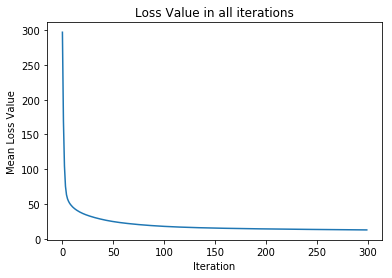

In [11]:
# 绘制不同iteration的loss
x = np.arange(max_epoch)
y = np.array(iter_loss)
plt.plot(x, y)
plt.title("Loss Value in all iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Loss Value")
plt.show()

#### Torch实现

In [12]:
import torch
from torch import nn
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
# 数据加载
data = load_boston()
X = data['data']
y = data['target']
y = y.reshape(-1,1)

In [14]:
# 数据规范化
ss = MinMaxScaler()
X = ss.fit_transform(X)

In [15]:
# 数据集切分
#X = torch.from_numpy(X).type(torch.FloatTensor)
#y = torch.from_numpy(y).type(torch.FloatTensor)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x = torch.from_numpy(train_x).type(torch.FloatTensor)
test_x = torch.from_numpy(test_x).type(torch.FloatTensor)
train_y = torch.from_numpy(train_y).type(torch.FloatTensor)
test_y = torch.from_numpy(test_y).type(torch.FloatTensor)

In [16]:
# 定义模型
model = nn.Sequential(
    nn.Linear(13, 16),
    nn.ReLU(),
    nn.Linear(16,1)
)
model.train()

Sequential(
  (0): Linear(in_features=13, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [17]:
# 定义优化器和损失函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [18]:
max_epoch = 300
iter_loss = []
# 训练
for i in range(max_epoch):
    # 前向传播
    y_pred = model(train_x)
    # 计算Loss
    loss = criterion(y_pred, train_y)
    if i%50 == 0:
        print(i, loss.item())
    iter_loss.append(loss.item())
    # 梯度清空
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 权重调整
    optimizer.step()

0 603.3572387695312
50 423.98236083984375
100 155.35350036621094
150 112.21162414550781
200 88.42393493652344
250 70.98167419433594


In [19]:
# 测试
output = model(test_x)
predict_list = output.detach().numpy()

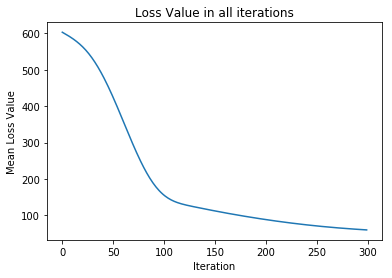

In [20]:
# 绘制不同iteration的loss
x = np.arange(max_epoch)
y = np.array(iter_loss)
plt.plot(x, y)
plt.title("Loss Value in all iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Loss Value")
plt.show()

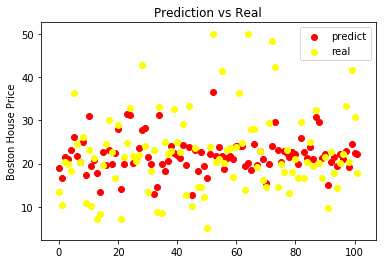

In [21]:
# 查看真实值与预测值的散点图
x = np.arange(test_x.shape[0])
y1 = np.array(predict_list) # 预测值
y2 = np.array(test_y) # 真实值
line1 = plt.scatter(x, y1, c='red', label='predict')
line2 = plt.scatter(x, y2, c='yellow', label='real')
plt.legend()
plt.title('Prediction vs Real')
plt.ylabel('Boston House Price')
plt.show()

### Action 2: 对移动推荐系统进行可视化数据探索
数据集https://tianchi.aliyun.com/competition/entrance/231522/information  
tianchi_fresh_comp_train_item.csv  
tianchi_fresh_comp_train_user.csv  
比如时间规律统计，4种行为类别的对比…  

In [22]:
# 引包
import pandas as pd

In [23]:
item_data_csv = 'data/fresh_comp_offline/tianchi_fresh_comp_train_item.csv'
user_data_csv = 'data/fresh_comp_offline/tianchi_fresh_comp_train_user.csv'

In [24]:
# # 生成小样本数据集(随机采样源数据集10%数据)
# train_item_sample = pd.read_csv(item_data_csv).sample(frac=0.1, random_state=6)
# train_user_sample = pd.read_csv(user_data_csv).sample(frac=0.1, random_state=6)
# train_item_sample.to_csv('data/train_item_sample.csv', index=0)
# train_user_sample.to_csv('data/train_user_sample.csv', index=0)

In [25]:
# 分块读取大数据集
def bigdata_to_chunks(bigdata_fname, target_path, chunk_fname):
    i=0
    for df in pd.read_csv(bigdata_fname, chunksize=100000):
        df.to_csv(target_path+'/%3d_' % (i) +chunk_fname, index=0)
        i+=1

In [26]:
# bigdata_to_chunks(user_data_csv, 'data/fresh_comp_offline/chunks', 'user_data.csv')

In [27]:
# item_data_csv = 'data/train_item_sample.csv'
# user_data_csv = 'data/train_user_sample.csv'

In [28]:
# 数据加载
train_user = pd.read_csv(user_data_csv)
train_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [29]:
# 计算CVR
count_all, count_4 = 0, 0
count_user = train_user['behavior_type'].value_counts()
count_all = count_user[1] + count_user[2] + count_user[3] + count_user[4]
count_4 += count_user[4]

cvr = count_4 / count_all
print('CVR = %.2f%%'%(cvr*100))

CVR = 1.00%


In [30]:
# 将time字段设置为pandas中的datetime类型
train_user['time'] = pd.to_datetime(train_user['time'])
train_user.index = train_user['time']
train_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


In [31]:
from collections import defaultdict
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [32]:
# 时间规律统计
def show_count_day(df):
    count_day = defaultdict(int)
    # 从2014-11-18遍历到2014-12-18
    str1 = '2014-11-17'
    temp_date = datetime.strptime(str1, '%Y-%m-%d')
    delta = timedelta(days=1)
    for i in range(31):
        temp_date = temp_date + delta
        # 将时间转化为字符串类型
        temp_str = temp_date.strftime('%Y-%m-%d')
        # train_user 的index为时间
        count_day[temp_str] += df[temp_str].shape[0]
    df_count_day = pd.DataFrame.from_dict(count_day, orient='index', columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

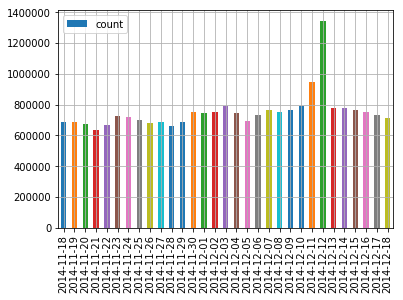

In [33]:
show_count_day(train_user)

In [34]:
# 属于商品子集的操作次数
train_item = pd.read_csv(item_data_csv)
train_item.head()

,item_id,item_geohash,item_category
0,100002303,NaN,3368
1,100003592,NaN,7995
2,100006838,NaN,12630
3,100008089,NaN,7791
4,100012750,NaN,9614


In [35]:
# 使用reset_index将index还原
train_data = pd.merge(train_user, train_item, on=['item_id','item_category']).set_index('time')
train_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,item_geohash
time,,,,,,
2014-12-03 01:00:00,10001082,275221686,1,NaN,10576,NaN
2014-12-13 14:00:00,10001082,275221686,1,NaN,10576,NaN
2014-12-08 07:00:00,10001082,275221686,1,NaN,10576,NaN
2014-12-08 07:00:00,10001082,275221686,1,NaN,10576,NaN
2014-12-08 00:00:00,10001082,275221686,1,NaN,10576,NaN


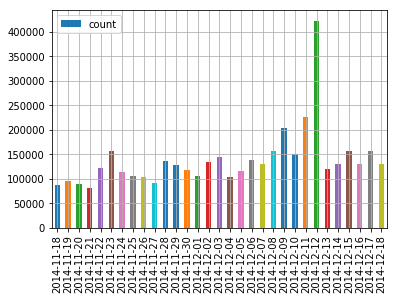

In [36]:
show_count_day(train_data)

In [37]:
def show_count_hour(df, date1):
    count_hour = {}
    # 设置初始值
    for i in range(24):
        time_str = date1 + " %02.d" % i
        count_hour[time_str] = [0, 0, 0, 0]
        temp = df[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1] += temp[temp.index[j]]
    # 从字典类型生成DataFrame
    df_count_hour = pd.DataFrame.from_dict(count_hour, orient='index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

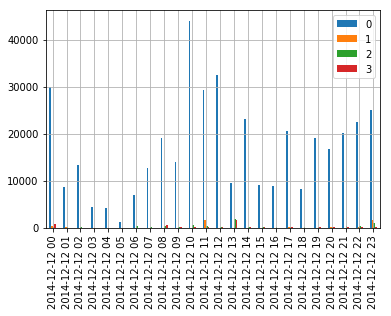

In [38]:
show_count_hour(train_data, '2014-12-12')